In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
print('python:', sys.version)
print('numpy:', np.__version__)
print('opencv', cv2.__version__)

python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
numpy: 1.19.2
opencv 4.0.1


## Small Image

In [3]:
img = cv2.imread('small.png')
display(img.shape)
display(type(img))
display(type(img[0,0,0]))

(25, 25, 3)

numpy.ndarray

numpy.uint8

In [4]:
print(img[22,10,:])

[  0 136  85]


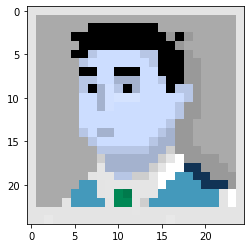

In [5]:
plt.imshow(img)
plt.show()

## BGR/RGB example

In [6]:
car = cv2.imread('car.jpg')
car.shape

(342, 570, 3)

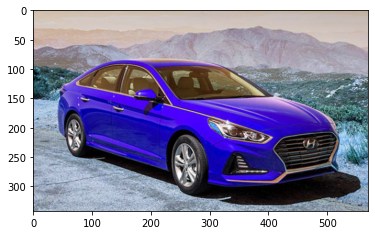

In [7]:
plt.imshow(car)
plt.show()

### Changing channels order convention

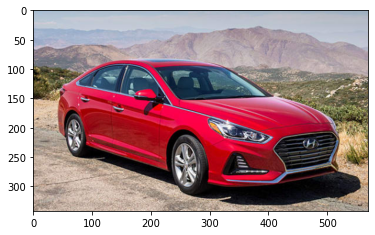

In [8]:
carRGB = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)
plt.imshow(carRGB)
plt.show()

### Let's see different channels

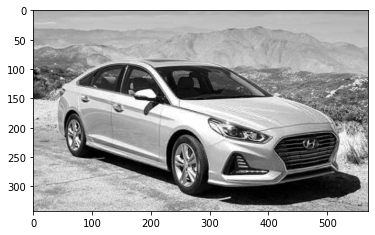

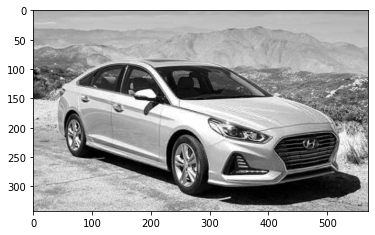

In [9]:
plt.imshow(car[...,2], cmap='gray') # BGR -> Blue[0], Green[1], Red[2]
plt.show()
plt.imshow(carRGB[...,0], cmap='gray') # RGB
plt.show()

### Manual conversion into grayscale

Y = 0.299 R + 0.587 G + 0.114 B

In [10]:
grayManual = car[...,0] * 0.114 + car[...,1] * 0.587 + car[...,2] * 0.299

In [11]:
print(type(grayManual))
print(type(grayManual[0,0]))

<class 'numpy.ndarray'>
<class 'numpy.float64'>


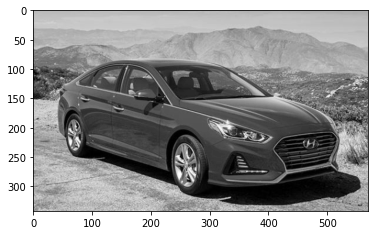

In [14]:
plt.imshow(grayManual, cmap='gray')
plt.show()

In [13]:
grayManual = grayManual.astype(np.uint8)

### OpenCV conversion into grayscale

<class 'numpy.ndarray'>
<class 'numpy.uint8'>


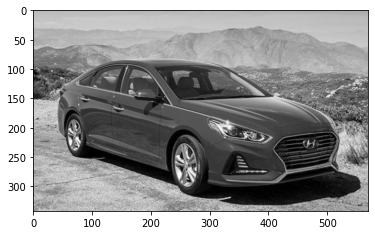

In [15]:
grayOpenCV = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
print(type(grayOpenCV))
print(type(grayOpenCV[0,0]))
plt.imshow(grayOpenCV, cmap='gray')
plt.show()

### Make white square image with black box inside

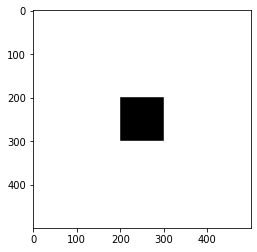

In [17]:
img2 = np.full((500, 500), 255, dtype = np.uint8)
img2[200:300, 200:300] = 0
plt.imshow(img2, cmap='gray')
plt.show()

## Filtering

### Manual filter

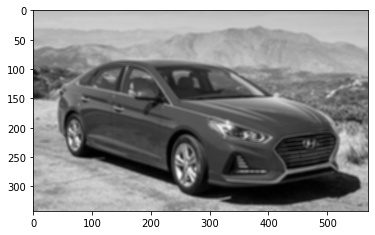

In [19]:
kernel = np.ones((5,5), dtype = np.float64) / 25
manual_filter = cv2.filter2D(grayOpenCV, -1, kernel)
plt.imshow(manual_filter, cmap='gray')
plt.show()

In [20]:
?cv2.filter2D

Docstring:
filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
.   @brief Convolves an image with the kernel.
.   
.   The function applies an arbitrary linear filter to an image. In-place operation is supported. When
.   the aperture is partially outside the image, the function interpolates outlier pixel values
.   according to the specified border mode.
.   
.   The function does actually compute correlation, not the convolution:
.   
.   \f[\texttt{dst} (x,y) =  \sum _{ \stackrel{0\leq x' < \texttt{kernel.cols},}{0\leq y' < \texttt{kernel.rows}} }  \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )\f]
.   
.   That is, the kernel is not mirrored around the anchor point. If you need a real convolution, flip
.   the kernel using #flip and set the new anchor to `(kernel.cols - anchor.x - 1, kernel.rows -
.   anchor.y - 1)`.
.   
.   The function uses the DFT-based algorithm in case of sufficiently large kernels (~`11 x 11`

### OpenCV filter

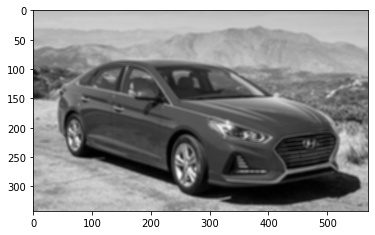

In [21]:
opencv_filter_mean = cv2.blur(grayOpenCV, (5,5))
plt.imshow(opencv_filter_mean, cmap='gray')
plt.show()

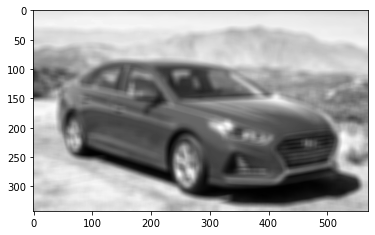

In [19]:
opencv_filter = cv2.GaussianBlur(grayOpenCV, (11, 11),10)
plt.imshow(opencv_filter, cmap='gray')
plt.show()

In [22]:
?cv2.GaussianBlur

Docstring:
GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
.   @brief Blurs an image using a Gaussian filter.
.   
.   The function convolves the source image with the specified Gaussian kernel. In-place filtering is
.   supported.
.   
.   @param src input image; the image can have any number of channels, which are processed
.   independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
.   @param dst output image of the same size and type as src.
.   @param ksize Gaussian kernel size. ksize.width and ksize.height can differ but they both must be
.   positive and odd. Or, they can be zero's and then they are computed from sigma.
.   @param sigmaX Gaussian kernel standard deviation in X direction.
.   @param sigmaY Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be
.   equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height,
.   respectively (see #getGaussianKernel for 